In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\Downloads\dirty_cafe_sales.csv")
# df = pd.read_csv(r"C:\Users\HP\Downloads\cardata.csv")

In [2]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
### check the missing values in data set 
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [4]:
df.shape

(10000, 8)

In [5]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
#  Unique Values in Each Column
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Transaction ID: 10000
Unique values in Item: 10
Unique values in Quantity: 7
Unique values in Price Per Unit: 8
Unique values in Total Spent: 19
Unique values in Payment Method: 5
Unique values in Location: 4
Unique values in Transaction Date: 367


In [7]:
df[df['Total Spent'].isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
25,TXN_7958992,Smoothie,3,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
65,TXN_4987129,Sandwich,3,NaN,NaN,NaN,In-store,2023-10-20
146,TXN_7623634,Cake,2,3.0,NaN,Credit Card,In-store,2023-07-11
171,TXN_8989148,Tea,2,1.5,NaN,NaN,NaN,2023-11-25
238,TXN_5526852,Sandwich,5,4.0,NaN,Digital Wallet,In-store,2023-09-28
...,...,...,...,...,...,...,...,...
9827,TXN_3392953,Coffee,1,2.0,NaN,Digital Wallet,Takeaway,2023-01-06
9838,TXN_6744733,Sandwich,1,4.0,NaN,Cash,Takeaway,UNKNOWN
9890,TXN_2749289,Smoothie,2,4.0,NaN,Digital Wallet,Takeaway,2023-05-05
9988,TXN_9594133,Cake,5,3.0,NaN,ERROR,NaN,NaN


In [8]:
#  Replace 'ERROR' in 'Total Spent' with NaN
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [9]:
import numpy as np

In [10]:
#### Replace 'UNKNOWN' in 'Payment Method' and 'Location' with NaN
df['Payment Method'].replace('UNKNOWN', np.nan, inplace=True)
df['Location'].replace('UNKNOWN', np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\1162143848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].replace('UNKNOWN', np.nan, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14524\1162143848.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [11]:
###    Fill Missing 'Payment Method' with Mode
payment_mode = df['Payment Method'].mode()[0]
df['Payment Method'].fillna(payment_mode, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\1085986537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(payment_mode, inplace=True)


In [12]:
#  Check for Duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

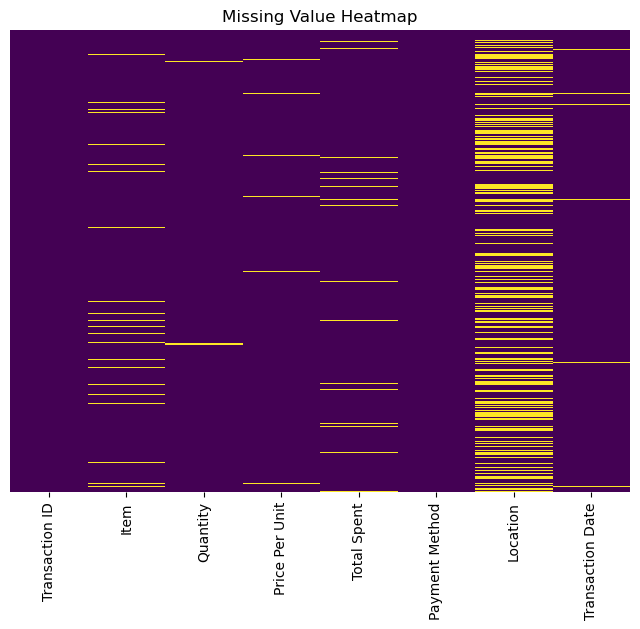

In [14]:
# Plot missing values heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [15]:
# Convert 'Transaction Date' to datetime, handling errors
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Extract year, month, day, and day of the week for valid dates
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()

# Print the resulting DataFrame
print(df)

     Transaction ID      Item Quantity Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee        2            2.0          4.0   
1       TXN_4977031      Cake        4            3.0         12.0   
2       TXN_4271903    Cookie        4            1.0          NaN   
3       TXN_7034554     Salad        2            5.0         10.0   
4       TXN_3160411    Coffee        2            2.0          4.0   
...             ...       ...      ...            ...          ...   
9995    TXN_7672686    Coffee        2            2.0          4.0   
9996    TXN_9659401       NaN        3            NaN          3.0   
9997    TXN_5255387    Coffee        4            2.0          8.0   
9998    TXN_7695629    Cookie        3            NaN          3.0   
9999    TXN_6170729  Sandwich        3            4.0         12.0   

      Payment Method  Location Transaction Date    Year  Month   Day  \
0        Credit Card  Takeaway       2023-09-08  2023.0    9.0   8.0   
1              

In [16]:
df['Quantity'].isnull().sum()

138

In [17]:
df['Price Per Unit'].isnull().sum()

179

In [18]:
df['Total Spent'].isnull().sum()

502

In [19]:
df['Item'].isnull().sum()

333

In [20]:
df['Location'].isnull().sum()

3603

In [21]:
most_frequent_item = df['Item'].mode()[0]
df['Item'] = df['Item'].fillna(most_frequent_item)

In [22]:
df['Item'].isnull().sum()

0

In [23]:
most_frequent_item = df['Quantity'].mode()[0]
df['Quantity'] = df['Quantity'].fillna(most_frequent_item)

In [24]:
most_frequent_item = df['Price Per Unit'].mode()[0]
df['Price Per Unit'] = df['Price Per Unit'].fillna(most_frequent_item)

In [25]:
most_frequent_item = df['Total Spent'].mode()[0]
df['Total Spent'] = df['Total Spent'].fillna(most_frequent_item)

In [26]:
most_frequent_item = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(most_frequent_item)

In [27]:
most_frequent_item = df['Month'].mode()[0]
df['Month'] = df['Month'].fillna(most_frequent_item)

In [28]:
most_frequent_item = df['Day'].mode()[0]
df['Day'] = df['Day'].fillna(most_frequent_item)

In [29]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['DayOfWeek'] = df['DayOfWeek'].fillna(df['DayOfWeek'].mode()[0])

In [30]:
df = df.drop(columns=['Transaction Date'])

In [31]:
df.isnull().sum()

Transaction ID    0
Item              0
Quantity          0
Price Per Unit    0
Total Spent       0
Payment Method    0
Location          0
Year              0
Month             0
Day               0
DayOfWeek         0
dtype: int64

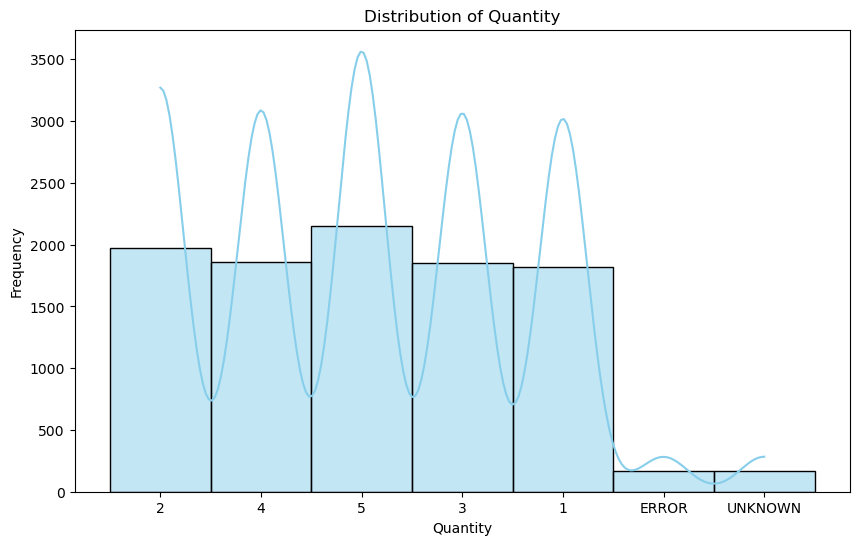

In [32]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

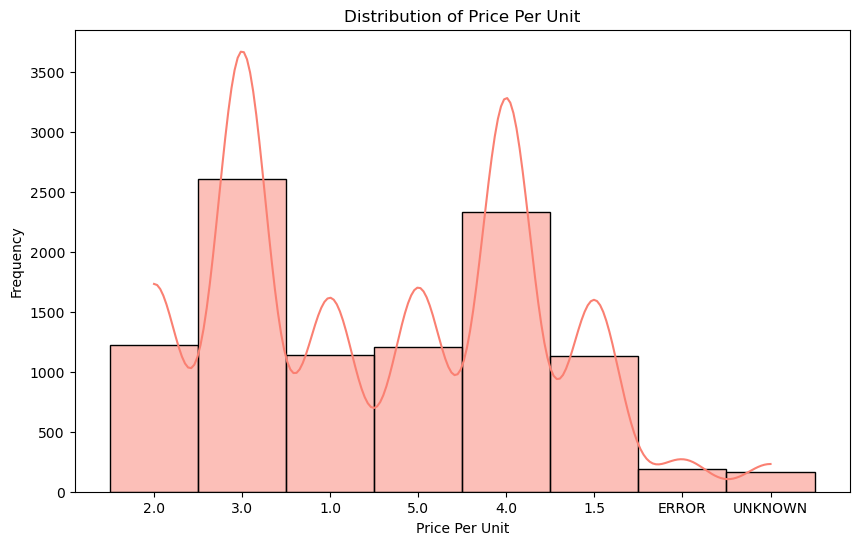

In [33]:
# Distribution of Price Per Unit
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Per Unit'], kde=True, color='salmon')
plt.title('Distribution of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.show()

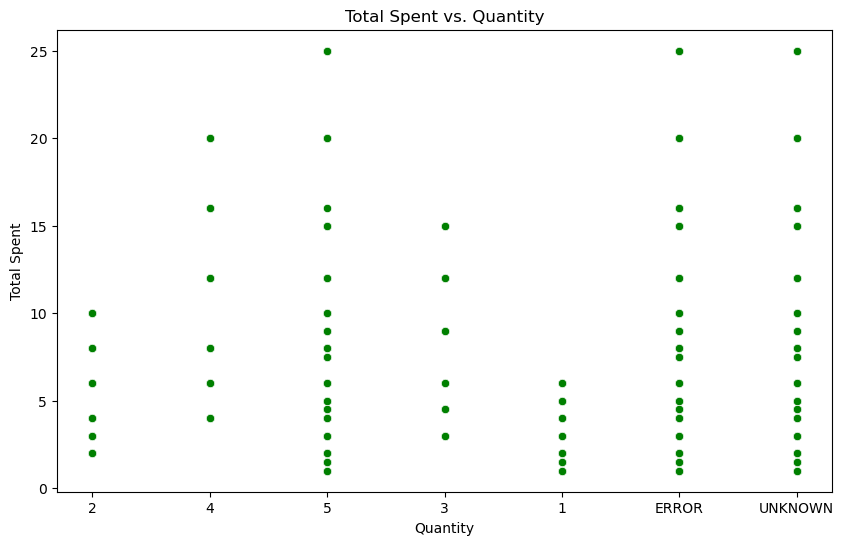

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Spent', data=df, color='green')
plt.title('Total Spent vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14524\2640197408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Total Spent', data=df, palette='Blues_d')


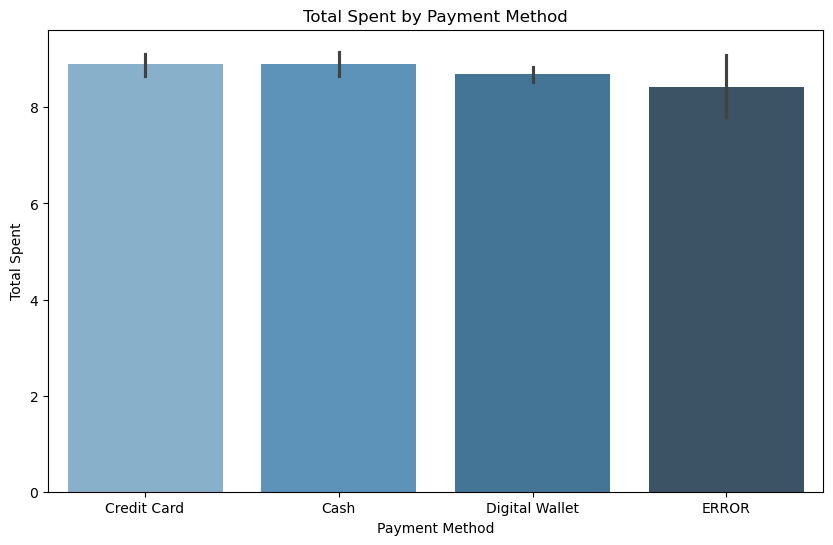

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Total Spent', data=df, palette='Blues_d')
plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')
plt.show()

<Axes: >

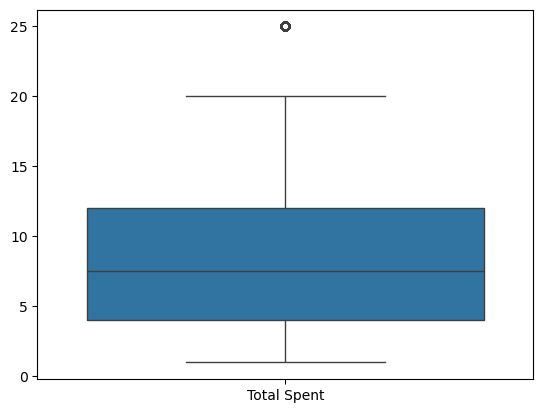

In [36]:
sns.boxplot(data=df[['Quantity', 'Price Per Unit', 'Total Spent']])


<Axes: xlabel='Payment Method', ylabel='count'>

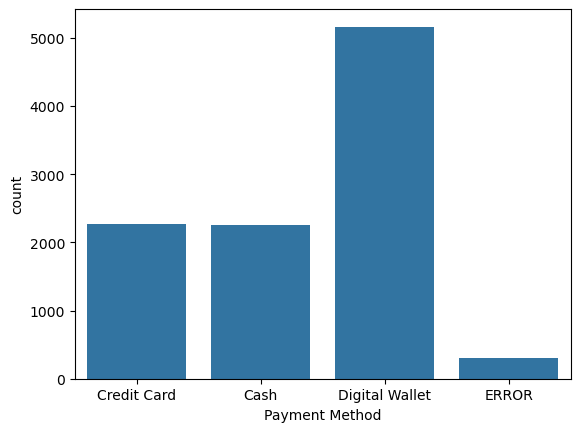

In [37]:
#  Plot a Bar Chart for `Payment Method`
sns.countplot(x='Payment Method', data=df)

<Axes: xlabel='DayOfWeek', ylabel='count'>

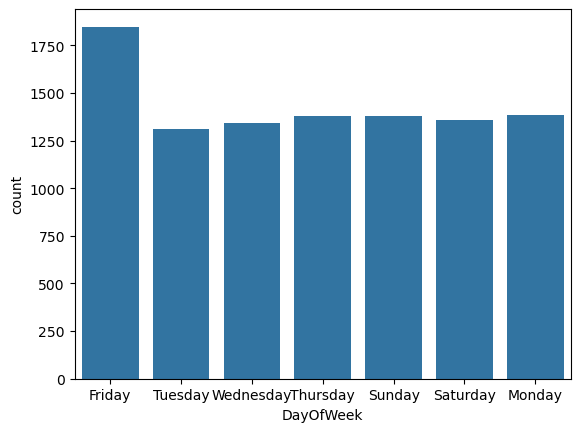

In [38]:
sns.countplot(x='DayOfWeek', data=df)


<Axes: xlabel='DayOfWeek', ylabel='Total Spent'>

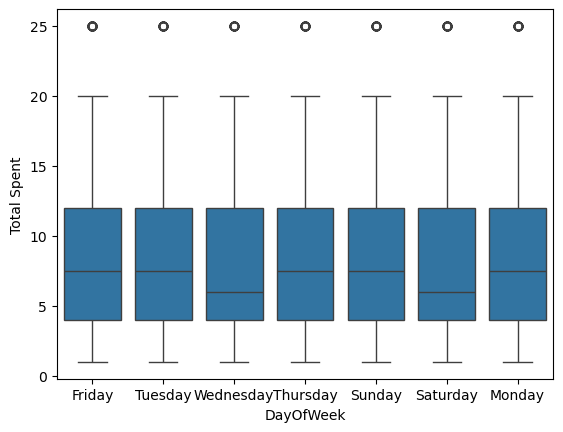

In [39]:
#  Plot Average `Total Spent` per Day of the Week
sns.boxplot(x='DayOfWeek', y='Total Spent', data=df)

<Axes: xlabel='Quantity', ylabel='Total Spent'>

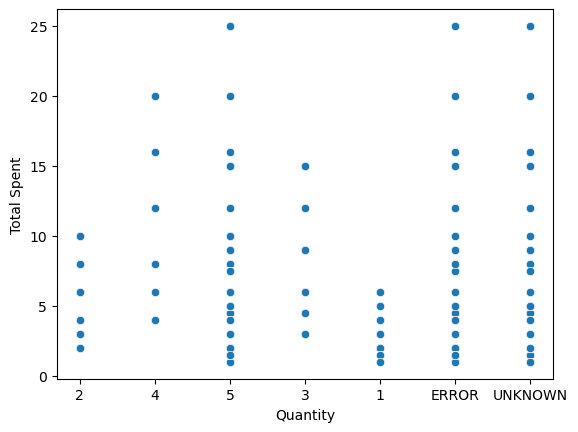

In [40]:
#  Analyze Relationship Between `Quantity` and `Total Spent`
sns.scatterplot(x='Quantity', y='Total Spent', data=df)

<Axes: xlabel='Item'>

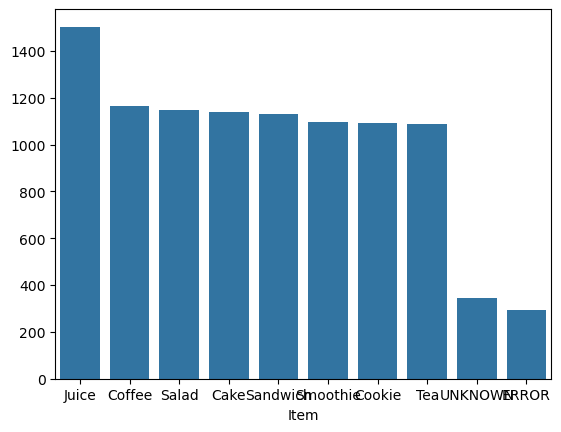

In [41]:
#  Analyze Item Popularity (Bar Plot)
item_counts = df['Item'].value_counts()
sns.barplot(x=item_counts.index, y=item_counts.values)

<Axes: xlabel='Location'>

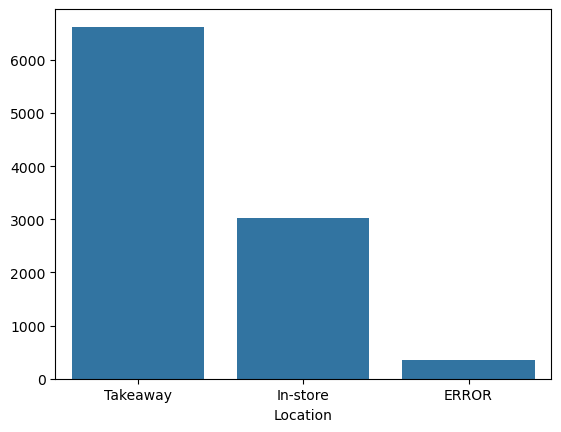

In [42]:
# Analyze Location Popularity (Bar Plot)
location_counts = df['Location'].value_counts()
sns.barplot(x=location_counts.index, y=location_counts.values)

<Axes: xlabel='Location', ylabel='Total Spent'>

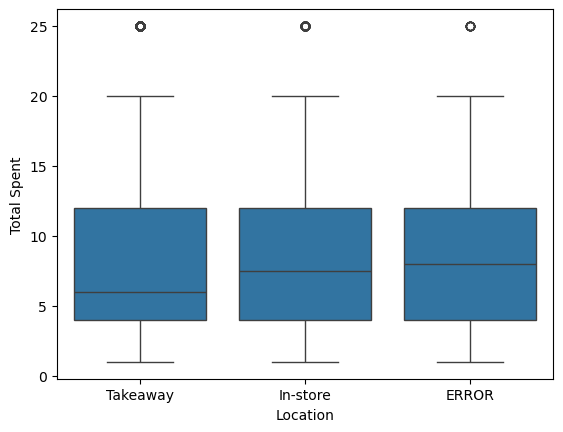

In [43]:
#  Boxplot for `Total Spent` by `Location`
sns.boxplot(x='Location', y='Total Spent', data=df)

<Axes: xlabel='Month'>

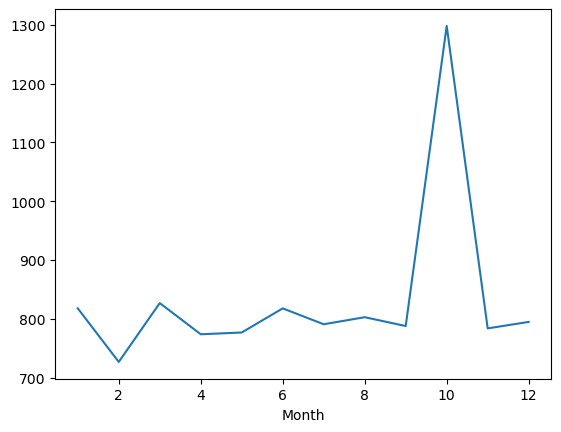

In [44]:
#  Check Transaction Frequency per Month
transaction_per_month = df.groupby('Month').size()
transaction_per_month.plot(kind='line')

<Axes: xlabel='Day'>

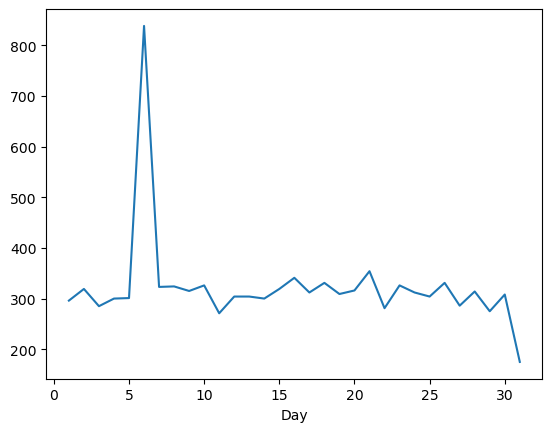

In [45]:
#  Check Transaction Frequency per Day
transaction_per_day = df.groupby('Day').size()
transaction_per_day.plot(kind='line')

<Axes: xlabel='DayOfWeek'>

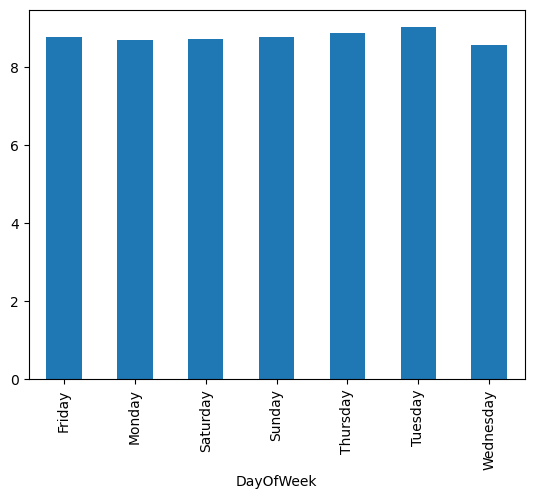

In [46]:
#  Check Average Spending by Day of Week
average_spending_by_day = df.groupby('DayOfWeek')['Total Spent'].mean()
average_spending_by_day.plot(kind='bar')

<Axes: xlabel='Date'>

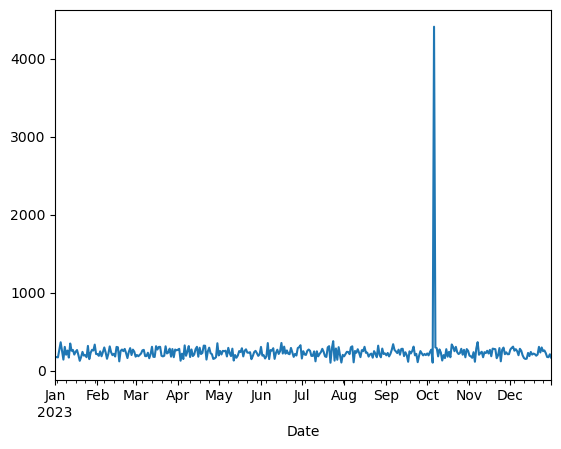

In [47]:

#  Visualize Transaction Data Over Time
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.groupby('Date')['Total Spent'].sum().plot(kind='line')

<Axes: >

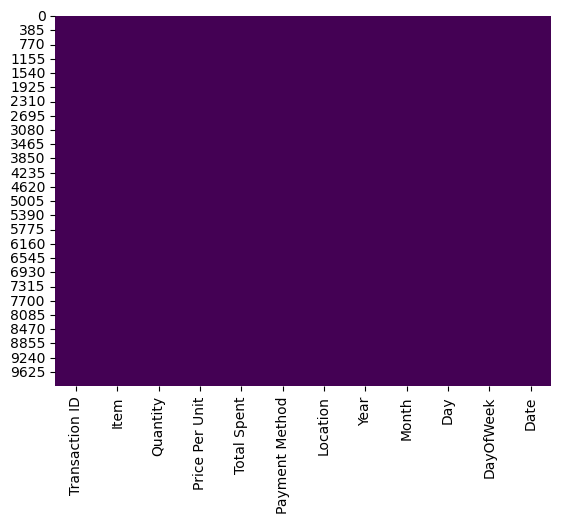

In [48]:

#  Investigate Missing Data Patterns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [49]:
print(df['Price Per Unit'].dtype)

object


In [50]:

# Data types
print(df.dtypes)

Transaction ID            object
Item                      object
Quantity                  object
Price Per Unit            object
Total Spent              float64
Payment Method            object
Location                  object
Year                     float64
Month                    float64
Day                      float64
DayOfWeek                 object
Date              datetime64[ns]
dtype: object


In [51]:
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    print(f"{col}: {unique_types}")

Transaction ID: [<class 'str'>]
Item: [<class 'str'>]
Quantity: [<class 'str'>]
Price Per Unit: [<class 'str'>]
Total Spent: [<class 'float'>]
Payment Method: [<class 'str'>]
Location: [<class 'str'>]
Year: [<class 'float'>]
Month: [<class 'float'>]
Day: [<class 'float'>]
DayOfWeek: [<class 'str'>]
Date: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [52]:
# Numerical columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [53]:

print(df.dtypes)

Transaction ID            object
Item                      object
Quantity                 float64
Price Per Unit           float64
Total Spent              float64
Payment Method            object
Location                  object
Year                     float64
Month                    float64
Day                      float64
DayOfWeek                 object
Date              datetime64[ns]
dtype: object


In [54]:
df = df.drop(columns=['Date'])


In [55]:
df = df.drop(columns=['Transaction ID'])

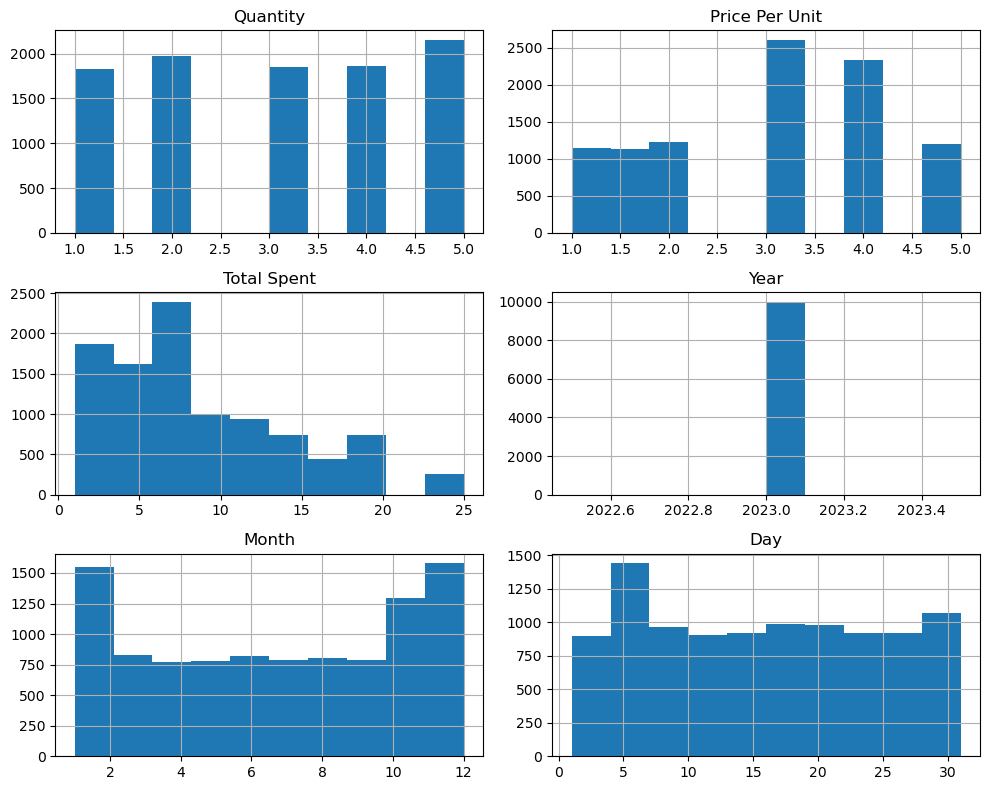

In [56]:
# Plotting histograms for numerical features
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
df[numerical_columns].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

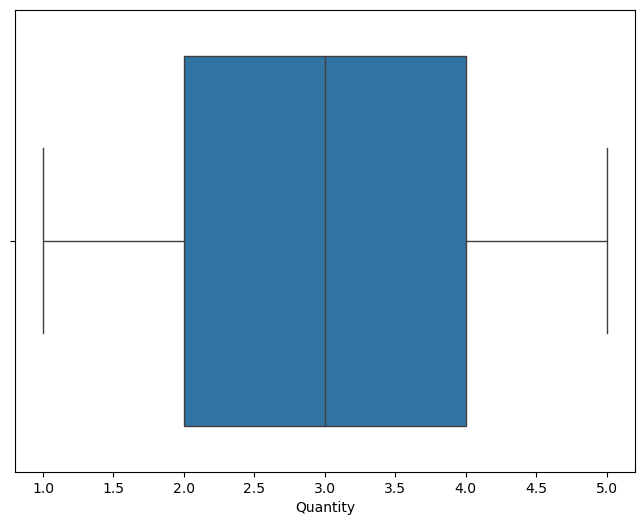

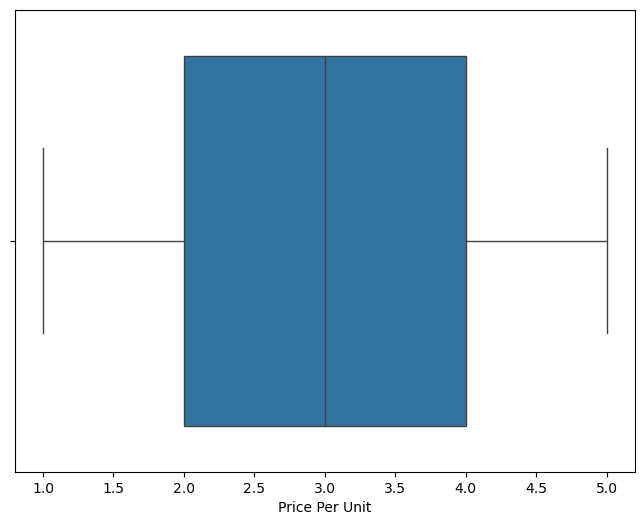

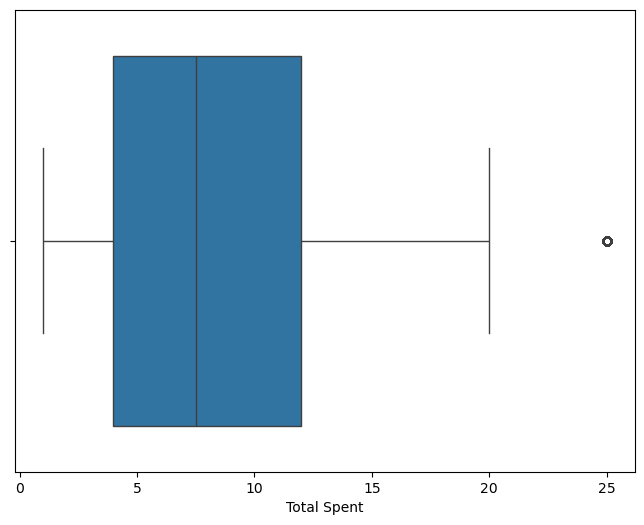

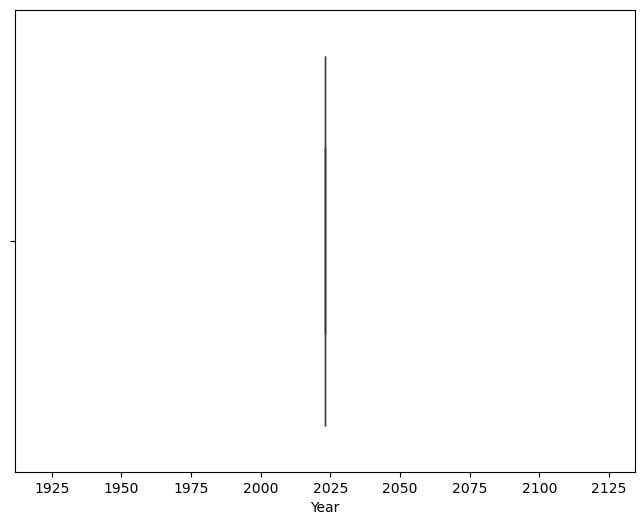

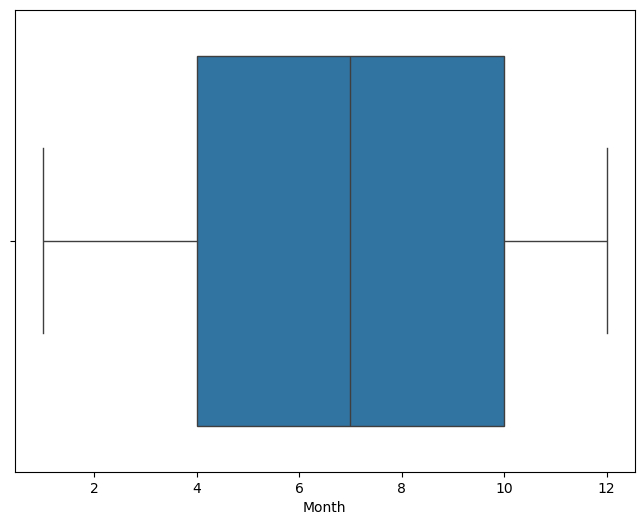

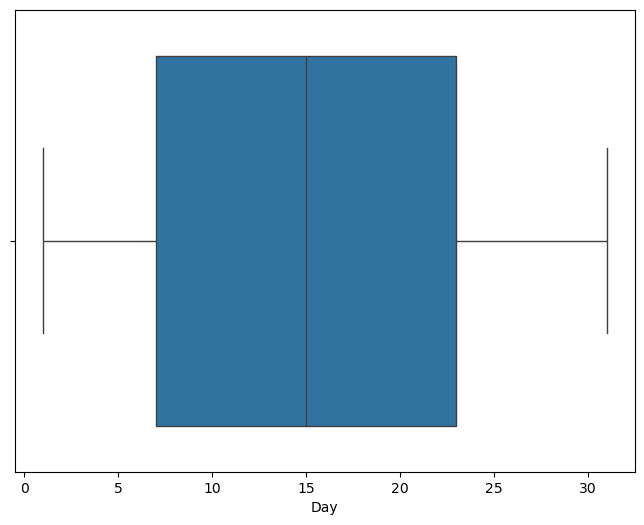

In [57]:
# Boxplots for outliers in numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.show()

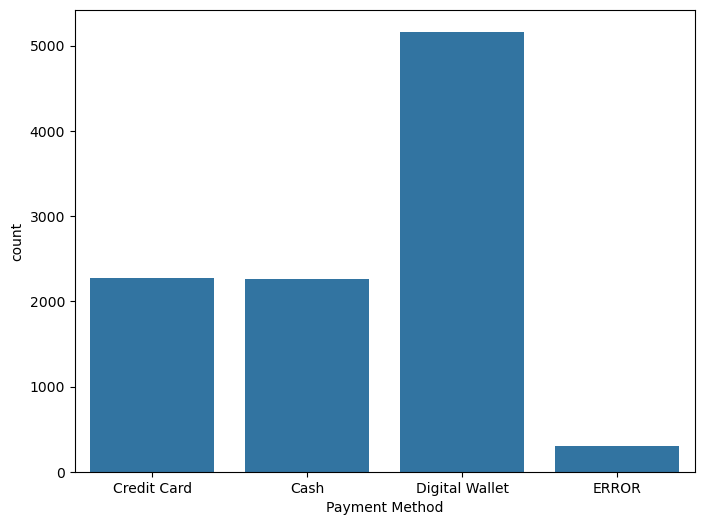

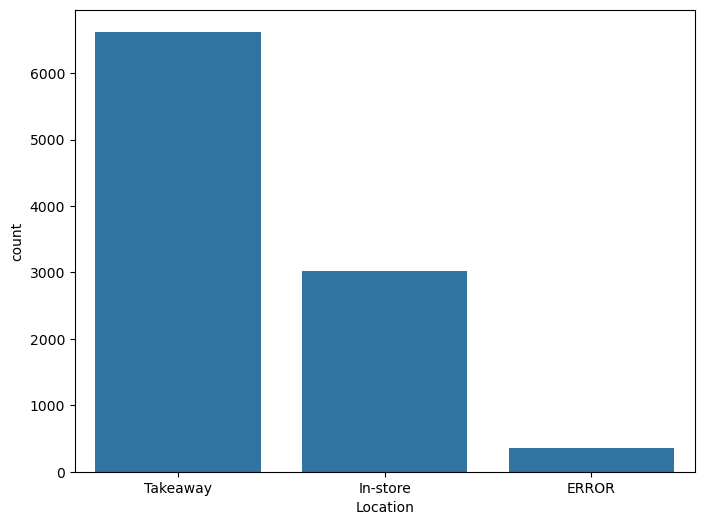

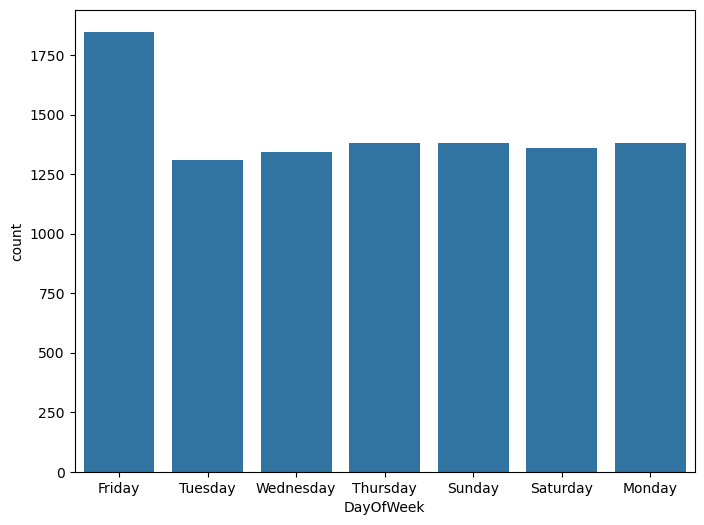

In [58]:
categorical_columns = ['Payment Method', 'Location', 'DayOfWeek']

# Plotting bar plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.show()

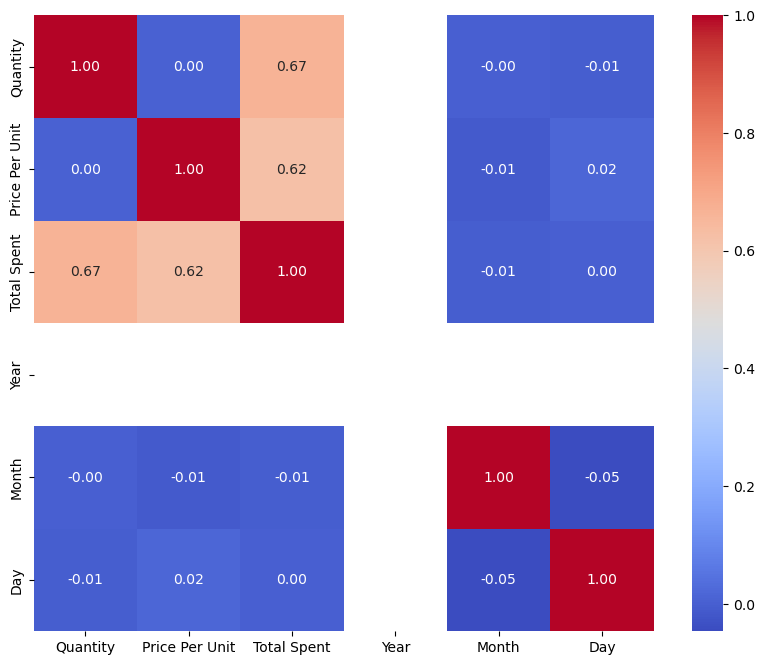

In [59]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

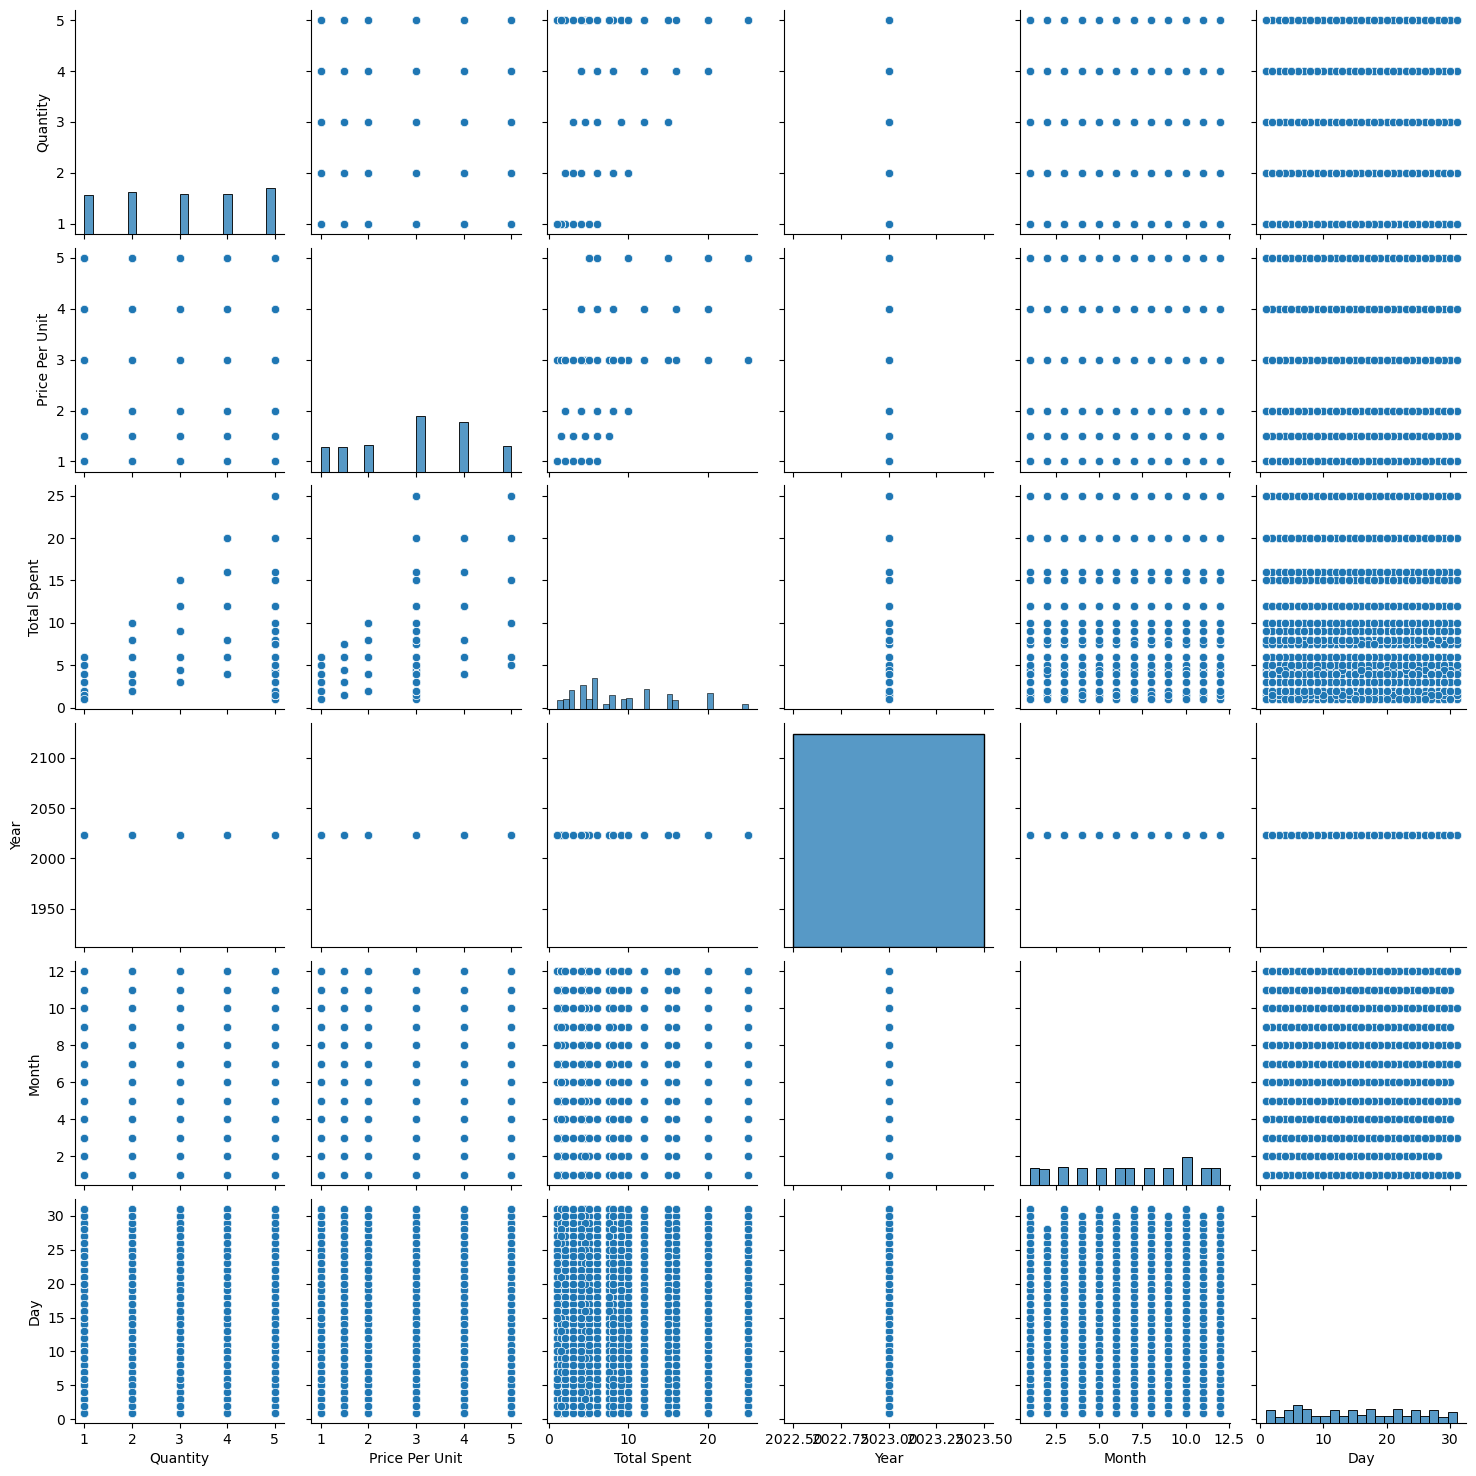

In [60]:

sns.pairplot(df[numerical_columns])
plt.show()

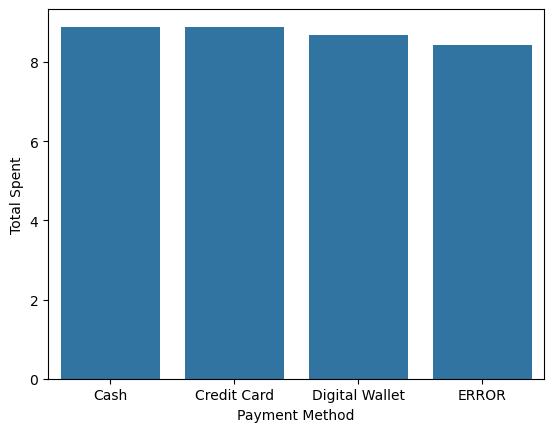

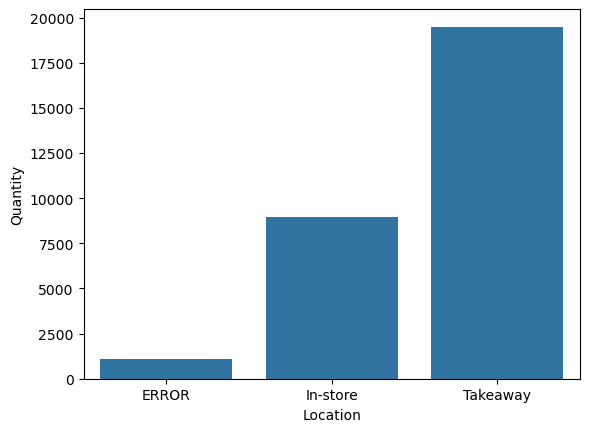

In [61]:
# Group by Payment Method and calculate the mean Total Spent
payment_method_spent = df.groupby('Payment Method')['Total Spent'].mean().reset_index()
sns.barplot(data=payment_method_spent, x='Payment Method', y='Total Spent')
plt.show()

# Group by Location and calculate the sum of Quantity
location_quantity = df.groupby('Location')['Quantity'].sum().reset_index()
sns.barplot(data=location_quantity, x='Location', y='Quantity')
plt.show()

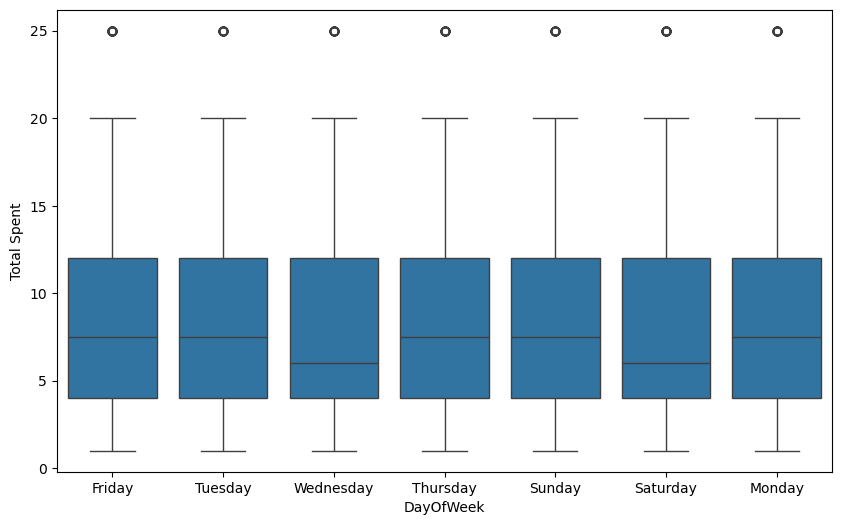

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DayOfWeek', y='Total Spent')
plt.show()

In [63]:
# List of numerical columns
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows where the column value is outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Display the cleaned dataset
print(df_cleaned)

          Item  Quantity  Price Per Unit  Total Spent  Payment Method  \
0       Coffee       2.0             2.0          4.0     Credit Card   
1         Cake       4.0             3.0         12.0            Cash   
2       Cookie       4.0             1.0          6.0     Credit Card   
3        Salad       2.0             5.0         10.0  Digital Wallet   
4       Coffee       2.0             2.0          4.0  Digital Wallet   
...        ...       ...             ...          ...             ...   
9995    Coffee       2.0             2.0          4.0  Digital Wallet   
9996     Juice       3.0             3.0          3.0  Digital Wallet   
9997    Coffee       4.0             2.0          8.0  Digital Wallet   
9998    Cookie       3.0             3.0          3.0  Digital Wallet   
9999  Sandwich       3.0             4.0         12.0            Cash   

      Location    Year  Month   Day  DayOfWeek  
0     Takeaway  2023.0    9.0   8.0     Friday  
1     In-store  2023.0   

In [74]:
from sklearn.preprocessing import LabelEncoder



# List of categorical columns
categorical_columns = ['Payment Method', 'Location', 'DayOfWeek']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataset with encoded labels
print(df)

      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location  \
0        1       2.0             2.0          4.0               1         2   
1        0       4.0             3.0         12.0               0         1   
2        2       4.0             1.0          6.0               1         1   
3        5       2.0             5.0         10.0               2         2   
4        1       2.0             2.0          4.0               2         1   
...    ...       ...             ...          ...             ...       ...   
9995     1       2.0             2.0          4.0               2         2   
9996     4       3.0             3.0          3.0               2         2   
9997     1       4.0             2.0          8.0               2         2   
9998     2       3.0             3.0          3.0               2         2   
9999     6       3.0             4.0         12.0               0         1   

        Year  Month   Day  DayOfWeek Target  
0    

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [76]:
# List of categorical columns
categorical_columns = ['Item']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataset with encoded labels
print(df)

      Item  Quantity  Price Per Unit  Total Spent  Payment Method  Location  \
0        1       2.0             2.0          4.0               1         2   
1        0       4.0             3.0         12.0               0         1   
2        2       4.0             1.0          6.0               1         1   
3        5       2.0             5.0         10.0               2         2   
4        1       2.0             2.0          4.0               2         1   
...    ...       ...             ...          ...             ...       ...   
9995     1       2.0             2.0          4.0               2         2   
9996     4       3.0             3.0          3.0               2         2   
9997     1       4.0             2.0          8.0               2         2   
9998     2       3.0             3.0          3.0               2         2   
9999     6       3.0             4.0         12.0               0         1   

        Year  Month   Day  DayOfWeek Target  
0    

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [78]:
imputer_num = SimpleImputer(strategy='mean')  # For numerical columns
imputer_cat = SimpleImputer(strategy='most_frequent')

In [79]:
df[['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']] = imputer_num.fit_transform(df[['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']])

In [80]:
# Create a binary target variable
df['Target'] = df['Total Spent'].apply(lambda x: 1 if x > 10 else 0)  # 1 if Total Spent > 10, else 0

In [81]:
# Categorize Total Spent into bins
bins = [0, 5, 10, 15, 20, 30, 50, 100]  # Example bin edges
labels = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-100']  # Corresponding labels

df['Target'] = pd.cut(df['Total Spent'], bins=bins, labels=labels)

In [82]:
# Define features and target
X = df.drop(['Total Spent', 'Target'], axis=1)
y = df['Target']

In [83]:
# Step 4: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the numerical features (if required for models like SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Step 6: Initialize a dictionary to store models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Training Random Forest...
Accuracy: 92.30%


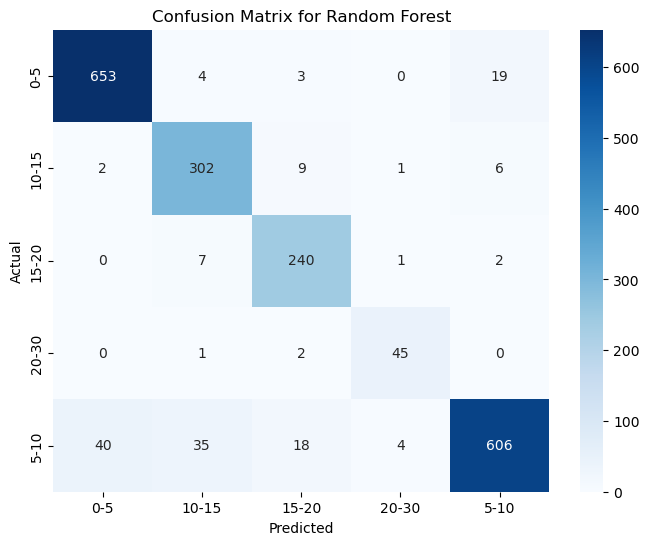


Training Support Vector Machine...
Accuracy: 90.45%


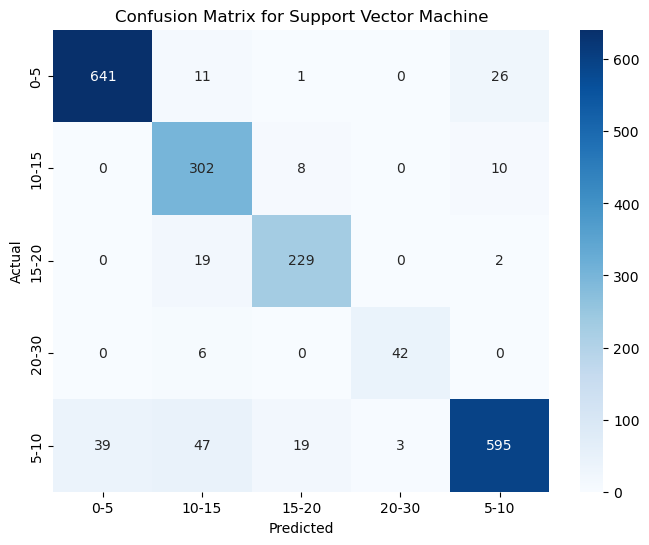


Training Logistic Regression...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 51.85%


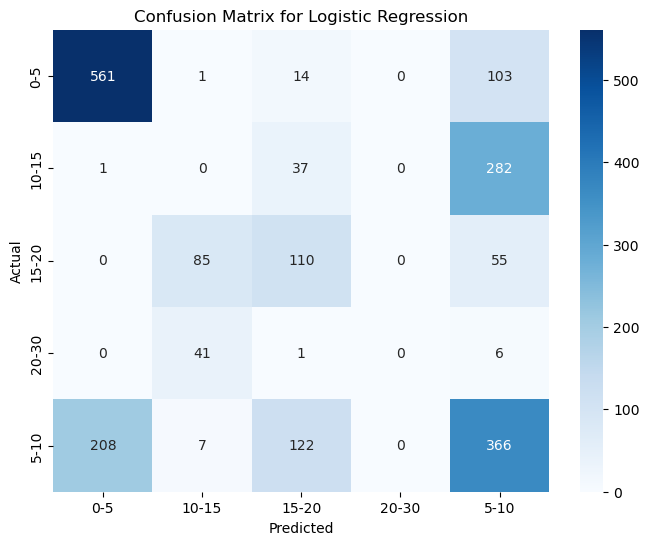


Training Decision Tree...
Accuracy: 87.15%


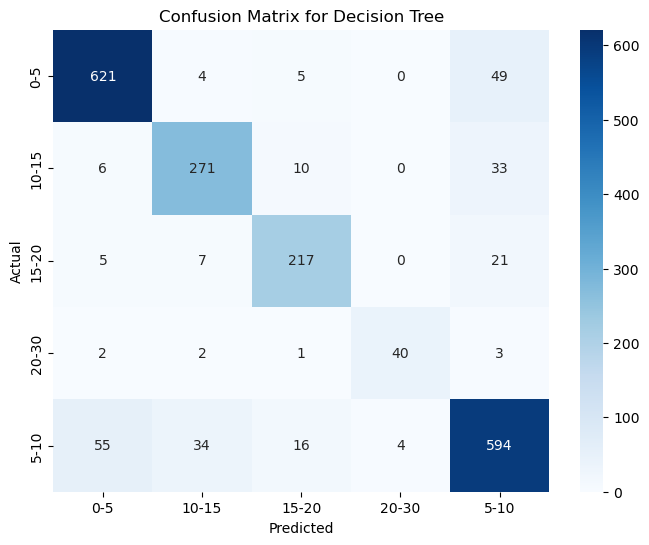


Training K-Nearest Neighbors...
Accuracy: 78.95%


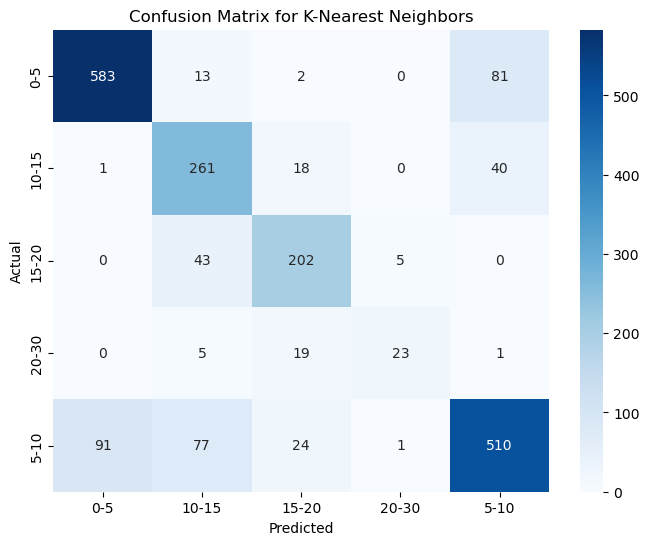


Training Naive Bayes...
Accuracy: 77.15%


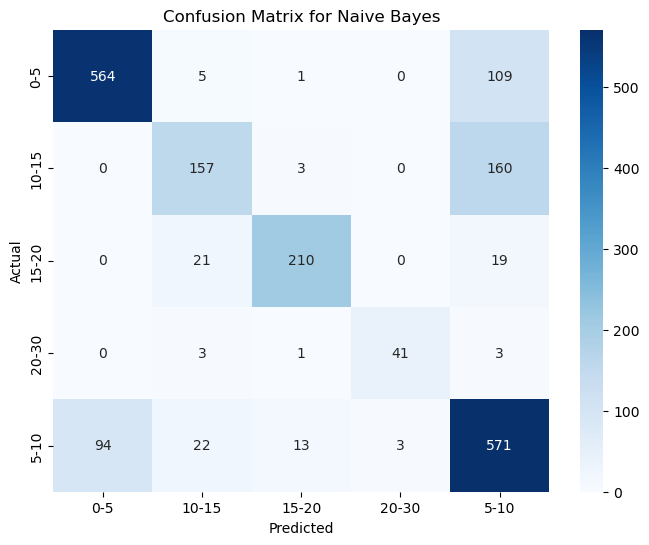

In [87]:
# Step 7: Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train model
    if model_name in ["Support Vector Machine", "K-Nearest Neighbors"]:
        # Models that require scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Other models that work fine with raw data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = accuracy
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Step 8: Plot confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()